**Detection of fake news using Machine Learning Alogrithms**

In [ ]:
# Importing the dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Loading the dataset

data = pd.read_csv('/content/News.csv',index_col=0)
data.shape

(44919, 5)

In [ ]:
# Dropping unwanted material
data = data.drop(["title", "subject","date"], axis = 1)

In [ ]:
# Checking if there is any null value in dataset
data.isnull().sum()

,0
text,0
class,0


In [ ]:
# Shuffling the data to model to not get bias
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

In [ ]:
# Data processing
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text


In [ ]:
# Data processing
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

 81%|████████▏ | 36608/44919 [29:59<05:27, 25.42it/s]

In [ ]:


x_train, x_test, y_train, y_test = train_test_split(data['text'],
                                                    data['class'],
                                                    test_size=0.25)


In [ ]:
vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

**Logistic Regression**


In [ ]:
# training the model in LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
# printing confusion matrix in LogisticRegression
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[True, False])

cm_display.plot()
plt.show()

In [ ]:
# Classification report in LogisticRegression
y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5878
           1       0.99      0.99      0.99      5352

    accuracy                           0.99     11230
   macro avg       0.99      0.99      0.99     11230
weighted avg       0.99      0.99      0.99     11230



 **DecisionTree** **Classifier**

In [ ]:
# training the model in DecisionTreeClassifer
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))


0.9999703167205913
0.9973285841495992


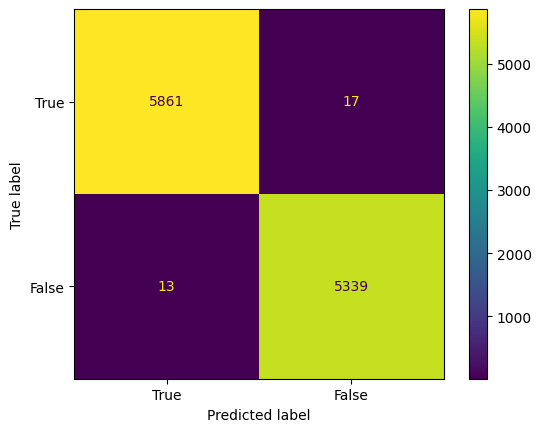

In [ ]:
# printing confusion matrix in DecisionTreeClassifier
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[True, False])

cm_display.plot()
plt.show()

In [ ]:
# Classification report in DecisionTreeClassifier
y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5878
           1       1.00      1.00      1.00      5352

    accuracy                           1.00     11230
   macro avg       1.00      1.00      1.00     11230
weighted avg       1.00      1.00      1.00     11230



**Support** **Vectro** **Machine**

In [ ]:
# training the model in support Vector Machine
model = LinearSVC()
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.9999406334411826
0.9957257346393589


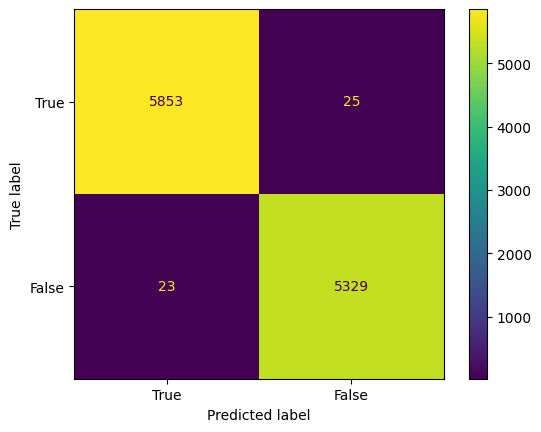

In [ ]:
# printing confusion matrix in Support Vectro Machine
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[True, False])

cm_display.plot()
plt.show()

In [ ]:
# Classification report in Support Vectro Machine
y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5878
           1       1.00      1.00      1.00      5352

    accuracy                           1.00     11230
   macro avg       1.00      1.00      1.00     11230
weighted avg       1.00      1.00      1.00     11230



 **Naive_Bayes**

In [ ]:
# training the model in Naive_Bayes
model =  MultinomialNB()
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))


0.9578794265190418
0.9483526268922529


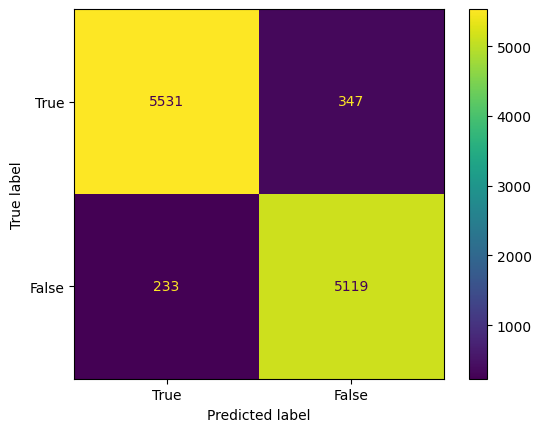

In [ ]:
# printing confusion matrix in Naive_Bayes
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[True, False])

cm_display.plot()
plt.show()

In [ ]:
# Classification report in  Naive_Bayes
y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      5878
           1       0.94      0.96      0.95      5352

    accuracy                           0.95     11230
   macro avg       0.95      0.95      0.95     11230
weighted avg       0.95      0.95      0.95     11230



**PassieveAgressive** **Classifier**

In [ ]:
# training the model in PassieveAgressive Classifier
model = PassiveAggressiveClassifier()
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))


0.9999703167205913
0.9965271593944791


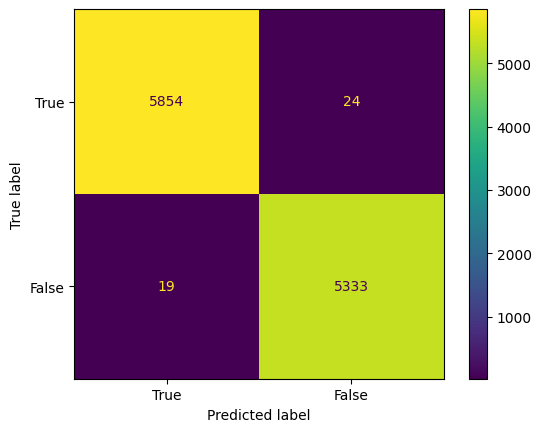

In [ ]:
# printing confusion matrix in PassieveAgressive Classifier
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[True, False])

cm_display.plot()
plt.show()

In [ ]:
# Classification report in PassieveAgressive Classifier
y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5878
           1       1.00      1.00      1.00      5352

    accuracy                           1.00     11230
   macro avg       1.00      1.00      1.00     11230
weighted avg       1.00      1.00      1.00     11230



**RandomForestClassifier**

In [ ]:
# training the model in RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))


0.9999703167205913
0.9918967052537845


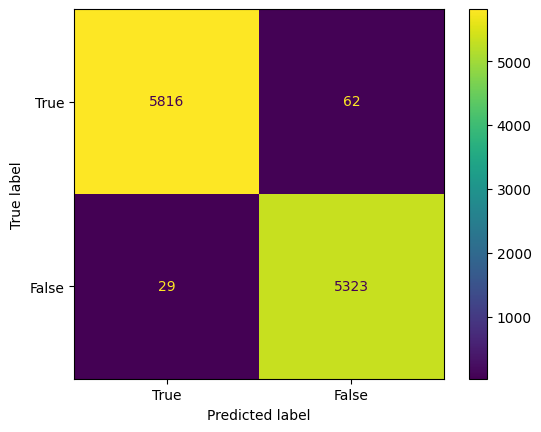

In [ ]:
# printing confusion matrix in RandomForestClassifier
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[True, False])

cm_display.plot()
plt.show()

In [ ]:
# Classification report in RandomForestClassifier
y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5878
           1       0.99      0.99      0.99      5352

    accuracy                           0.99     11230
   macro avg       0.99      0.99      0.99     11230
weighted avg       0.99      0.99      0.99     11230

